# Cars4U Pricing Analysis

### Objective

    Explore and visualize the cars4u dataset.
    Build a linear regression model to predict the prices of used cars.
    Generate a set of insights and recommendations that will help the business.

### Data Dictionary 

    S.No. : Serial Number
    Name : Name of the car which includes Brand name and Model name
    Location : The location in which the car is being sold or is available for purchase Cities
    Year : Manufacturing year of the car
    Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
    Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
    Transmission : The type of transmission used by the car. (Automatic / Manual)
    Owner : Type of ownership
    Mileage : The standard mileage offered by the car company in kmpl or km/kg
    Engine : The displacement volume of the engine in CC.
    Power : The maximum power of the engine in bhp.
    Seats : The number of seats in the car.
    New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
    Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)


## Problem Statement
As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Define a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

## 1. Loading Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 200)

## 2. Loading and Exploring Data
In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [2]:
df = pd.read_csv('used_cars_data.csv', index_col = 0)
r1 = df.shape[0]
c1 = df.shape[1]
print(f'There are {r1} rows and {c1} columns')

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time

np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 13 columns


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


***Observations***
1. It appears the `New_Price` column is missing a lot of data.
2. `Mileage`, `Engine` and `Power` all contain non numeric values which will need to be handled
3. `Name` will need to be simplified in order to use one-hot encoding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


***Observation***
1. `Year` and `Kilometers_Driven` are integer data type
2. `Seats` and `Price` are float data type
3. All other values are str data type
4. As assumed `New Price` is missing from most rows

### Evaluate Missing Values
I want to understand how much data is missing from the dataset and make a determination on how to best handle it.

In [4]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

***Observation***
1. The `New_Price` column is missing most of its values and should be dropped. However, I may consider replacing it with a column that shows average new price based on the Make and Model of the car.
2. `Price` is missing a significant number of values, I feel that because it is the target value I may choose to drop the rows that have missing values rather than working with assumed values.
3. Being that `Seats`, `Power`, `Engine` and `Mileage` columns are all missing small amounts of data I will probably drop these rows as I don't think it will have a significant impact on the model.

In [5]:
# missing values based on the number of missing values per row.
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

1    5335
2    1048
0     823
4      36
5      10
3       1
dtype: int64

In [6]:
# missing values by column name based on the number of missing values per row.
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NAs are found in:
Mileage         1
New_Price    5152
Price         182
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Mileage         1
Seats           6
New_Price    1048
Price        1041
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Seats        1
New_Price    1
Price        1
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine       36
Power        36
Seats        36
New_Price    36
dtype: int64



For the rows with exactly 5 missing values, NAs are found in:
Engine       10
Power        10
Seats        10
New_Price    10
Price        10
dtype: int64





***Observations***
1. Most of the rows that are missing values appear to be in large part because of the `New_Price` and `Price` columns
2. 14% of rows are missing at least two variables
3. It appears that rows with missing data in the `Engine` column are also missing data in the `Power`, `Seats` and `New_Price` column.
4. Recommend dropping the rows that contain missing values in the `New_Price`, `Price`, `Engine`, `Power` and `Seats` columns. If it appears to have a notable impact on the Linear Regression I will explore other options to handle the missing values.

In [7]:
# dropping the New_Price column
df.drop('New_Price', axis=1, inplace = True)

In [8]:
# dropping all rows with missing data
df.dropna(inplace = True) 

After dropping the `New_Price` column and the rows with missing values in the `New_Price`, `Price`, `Engine`, `Power` and `Seats` columns I'll take a look at the impact on the shape of the dataset.

In [9]:
# Assess the change to the datasets shape
r2 = df.shape[0]
c2 = df.shape[1]
print('Observations:')
print(f'There are now {r2} rows and {c2} columns, which is {r1 - r2} fewer rows and {c1 - c2} fewer columns than we started with.')

Observations:
There are now 5975 rows and 12 columns, which is 1278 fewer rows and 1 fewer columns than we started with.


# 3. Processing columns and Feature Development

Create a copy of the `df` dataset to be used for feature development. This will be the dataset used for visual analysis and Linear Regression.

In [10]:
# create a copy of the dataset
df_copy = df

The `Name` column in its current form has little value so I'll separate the first two words in the name from the remaing text and place the first word in a column labeled `Make` and the second word in a column labeled `Model`

In [11]:
# create two new columns in df_copy to contain the car's Make and Model
make_model = df_copy["Name"].str.split(" ", n = 2, expand = True)
df_copy['Make'] = make_model[0]
df_copy['Model'] = make_model[1]

Now that I have the `Make` and `Model` columns populated I no longer need the `Name` column and will drop it.

In [12]:
# drop the `Name` column
df_copy.drop('Name',axis = 1, inplace = True)

## Feature Experiment: Average New Car Price
The following is an attempt to see if creating a column containing an average price per car based on the Make and Model would have a positive impact on the R^2 score.

To begin I created a separate dataset containing only the Make and Model and the Average New Price based
on the available values in the `New_Price` column. I then loaded that file.
<pre>ap = pd.read_csv('avg_new_price.csv')</pre>

I then created a temporary column called `Make_Model` within `df_copy`
<pre>df_copy['Make_Model'] = df_copy['Make'] + ' ' + df_copy['Model']</pre>

I Merged the `ap dataset` into the `df_copy` dataset
<pre>df_copy = df_copy.merge(ap.assign(in_index="yes"), on=['Make_Model'], how='left').fillna({'in_index':'no'})</pre>

Finally, I dropped the `Make_Model` and `in_index` columns as they were only temporary
<pre>df_copy.drop(['Make_Model','in_index'], axis=1, inplace=True)</pre>

***Observations***
1. Including an `Avg_New_Price` feature had marginally no impact on the train R^2 score
2. `Avg_New_Price` had a notable negative impact on the test R^2 score
3. Unsure if actual pricing would have had a better impact
4. Due to poor results I chose not to include this feature in the final model

### Create columns containing the `Age` of the car and `Average Miles Driven per Year`

Using the `Year` column I'll create a column containing the current age of the vehicle, then I'll use the current age in combination with the `Kilometers_Driven` column to identify average miles per year.

In [13]:
# create a column to display the age of the car
current_year = 2021
df_copy['Car_Age'] = current_year - df_copy['Year']

In [14]:
# create a column for the average number of miles driven per year
miles_per_year = 0
df_copy['Km_Per_Year'] = df_copy['Kilometers_Driven'] / df_copy['Car_Age']

***Convert `Mileage` column into a numeric column***
1. Remove km/kg or kmpl as a unit of measurement from the Mileage column
2. Change data type to Numeric

In [15]:
def mileage_to_num(mileage_val):
    """This function takes in a string representing a mileage in km/kg or kmpl
    and converts it to a number. For example, '800 km/kg' becomes 800.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(mileage_val, str):  # checks if `income_val` is a string
        return float(mileage_val.replace('km/kg', '').replace('kmpl', ''))
    else:  # this happens when the current income is np.nan
        return np.nan

df_copy['Mileage'] = df_copy['Mileage'].apply(mileage_to_num)

***Convert `Engine` column into a numeric column***
1. Remove CC as a unit of measurement from the Engine column
2. Change data type to Numeric

In [16]:
df_copy['Engine'] = df_copy['Engine'].str.strip('CC').apply(lambda col:pd.to_numeric(col, errors='coerce'))

***Convert `Power` column into a numeric column***
1. Remove bhp as a unit of measurement from the Power column
2. Change data type to Numeric

In [17]:
df_copy['Power'] = df_copy['Power'].str.strip('bhp').apply(lambda col:pd.to_numeric(col, errors='coerce'))

Now I want to check the current state of missing values.

In [18]:
# looking at which columns have the most missing values
df_copy.isnull().sum().sort_values(ascending=False)

Power                103
Km_Per_Year            0
Car_Age                0
Model                  0
Make                   0
Price                  0
Seats                  0
Engine                 0
Mileage                0
Owner_Type             0
Transmission           0
Fuel_Type              0
Kilometers_Driven      0
Year                   0
Location               0
dtype: int64

***Observations***
1. `Power` is the only column with missing values
2. Being that power is a value than is dependent on a number of other values I don't want to generalize this by using the mean, and because the number of missing values isn't relatively too high I have choosen to drop the rows with missing values.

In [19]:
#drop nan
df_copy.dropna(inplace = True)

In [20]:
# review the data
df_copy.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make,Model,Car_Age,Km_Per_Year
S.No.,,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti,Wagon,11,6545.454545
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai,Creta,6,6833.333333
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda,Jazz,10,4600.000000
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti,Ertiga,9,9666.666667
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi,A4,8,5083.750000
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,55.20,5.0,2.35,Hyundai,EON,9,8333.333333
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5.0,3.50,Nissan,Micra,8,10874.875000
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8.0,17.50,Toyota,Innova,5,7200.000000
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.60,5.0,5.20,Volkswagen,Vento,8,8053.750000


Next, I want to use one-hot encoding on the `Make`, `Model`, `Location`, `Fuel_Type`, `Transmission`, and `Owner_Type` columns. I may want to keep an instance of these columns as categories for visual analysis so I'll copy them before creating the dummy values.

In [21]:
# duplicate the columns Location, Fuel_Type, Transmission, Owner_Type
# as I plan to one-hot encode these later
new_cols = ['Make','Model','Location','Fuel_Type','Transmission','Owner_Type']
for col in new_cols:
    df_copy['Vehicle_' + col] = df_copy[col]

Now I'll create the dummy values

In [22]:
# create dummy varaiables
for col in new_cols:
    df_copy = pd.get_dummies(df_copy, columns=[col], drop_first=True)

I want to take a look at the shape of the `df_copy` dataset after the most recent feature additions and row deletions.

In [23]:
# Assess the change to the datasets shape
r3 = df.shape[0]
c3 = df.shape[1]
print('Observations:')
print(f'There are now {r3} rows and {c3} columns, which is {r1 - r3} fewer rows and {c3-c1} more columns than we started with.')

Observations:
There are now 5872 rows and 21 columns, which is 1381 fewer rows and 8 more columns than we started with.


Next I'd like to change the datatype of the `Year` column in order to use it as an integer 

In [24]:
df_copy['Year'] = df_copy.Year.astype(int)

***Summary Statistics of the `df_copy` dataset***

Now I'll take a look at the summary statistics of the `df_copy` dataset. To simplify readibility I will remove the decimal values.

In [25]:
# removing the decimal in order to clean up the readibility
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_copy.describe().T # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
Year,5872,2013,3,1998,2012,2014,2016,2019
Kilometers_Driven,5872,58317,92169,171,33422,52609,72403,6500000
Mileage,5872,18,4,0,15,18,21,34
Engine,5872,1626,602,624,1198,1496,1991,5998
Power,5872,113,54,34,75,98,138,560
...,...,...,...,...,...,...,...,...
Fuel_Type_Petrol,5872,0,0,0,0,0,1,1
Transmission_Manual,5872,1,0,0,0,1,1,1
Owner_Type_Fourth & Above,5872,0,0,0,0,0,0,1
Owner_Type_Second,5872,0,0,0,0,0,0,1


***Observations***
1. `Kilometers_Driven` appears to be heavily Right-Skewed
2. `Mileage`, `Engine` and `Power` all seem to be Right-Skewed
3. `Year` appears to be reasonably distributed

# 4. Visual Analysis
Now I'll perform a visual analysis to identify and unique relationships to be considered within the model.

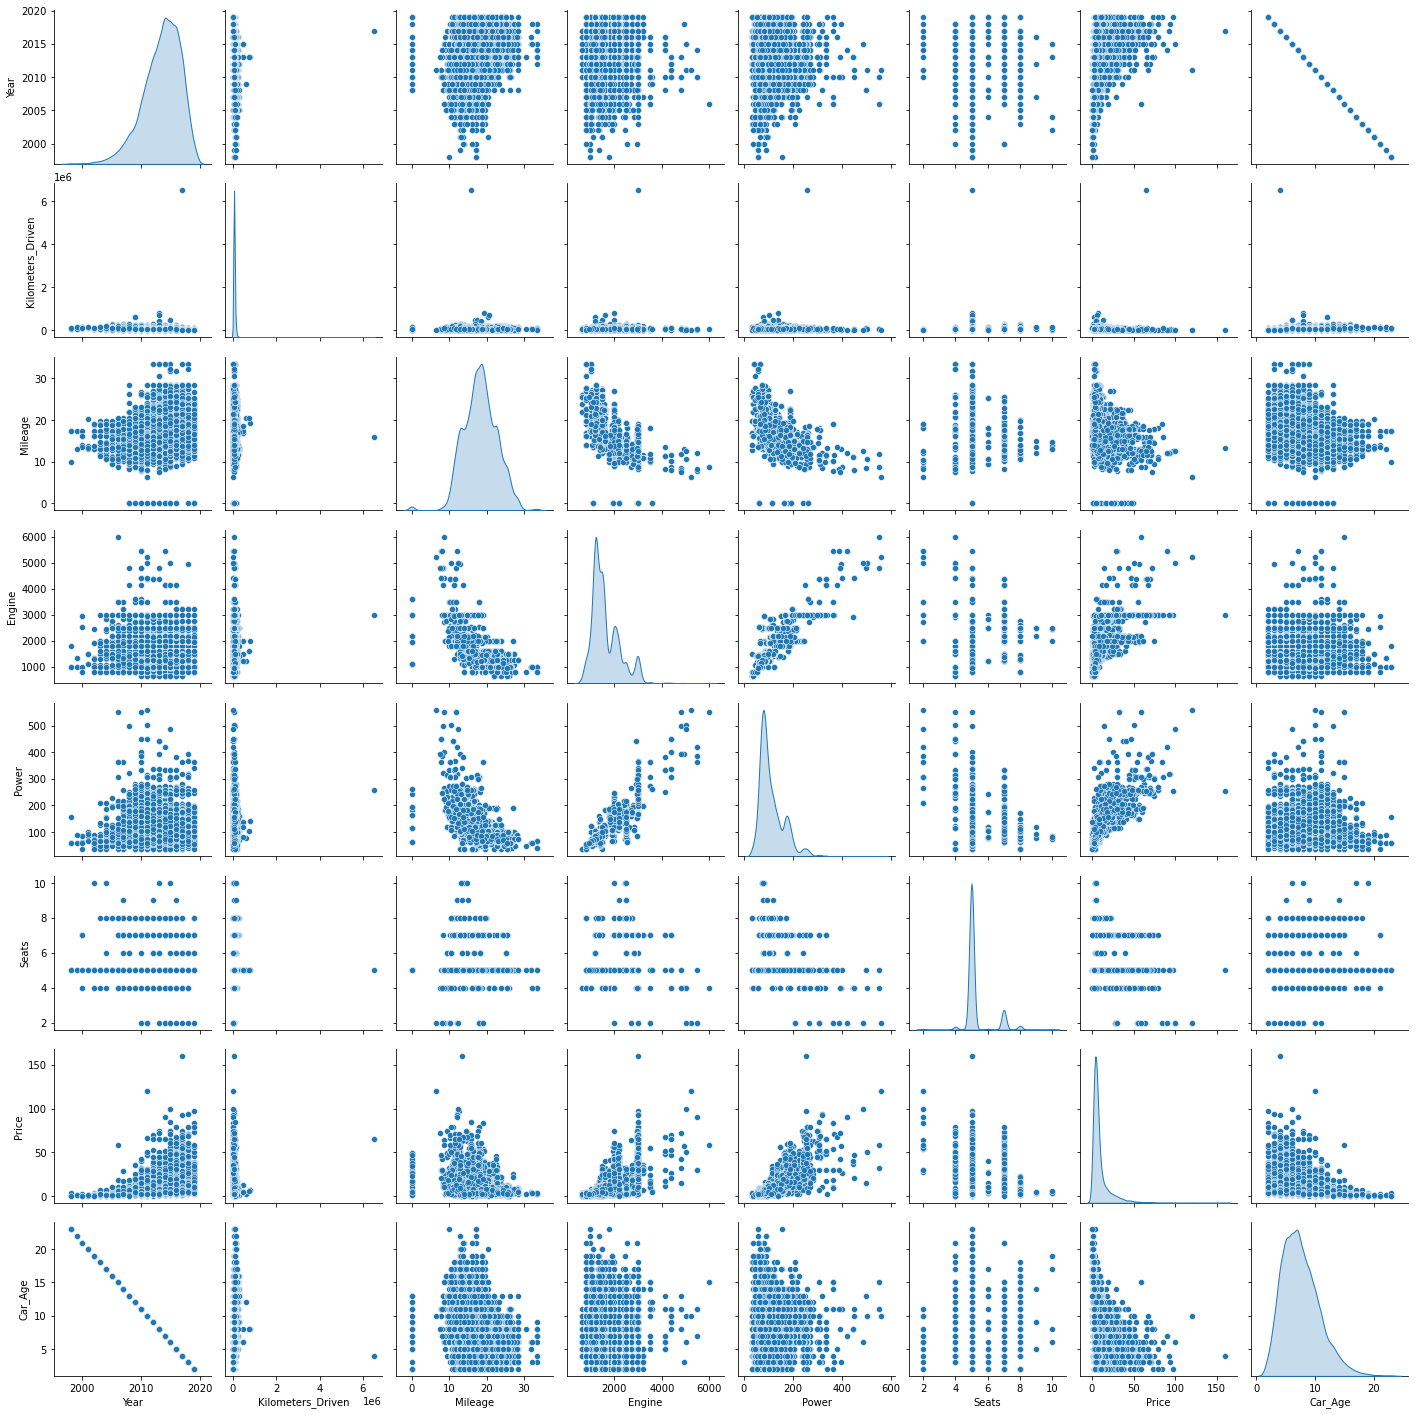

In [26]:
df_copy_attr = df_copy.iloc[:, 0:8]
sns.pairplot(df_copy_attr, diag_kind='kde'); 

## Review of Data by Price
As `Price` will be the dependent variable I want to take a closer look at how the data is distributed.

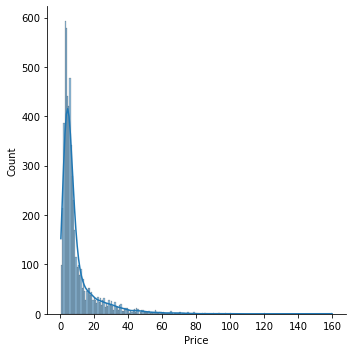

In [27]:
sns.displot(df_copy['Price'], kde = True);

 **Observations:**
 1. The median price of a vehicle within the dataset is 10
 2. There is clearly a positively skewed (right-skewed) distribution in regards to price
 3. I'll apply a log scale to `Price` to see if it improves the visualization.

***Apply Log transformation to `Price`***

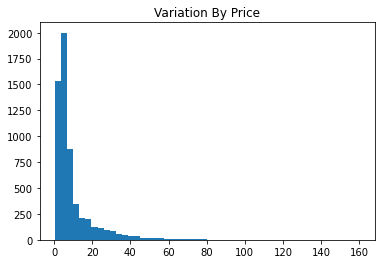

0


In [28]:
plt.hist(df_copy['Price'], bins=50)
plt.title('Variation By Price')
plt.show()
print(np.sum(df_copy['Price'] <= 0))

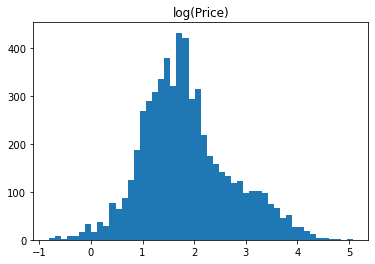

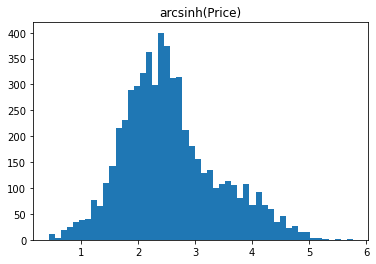

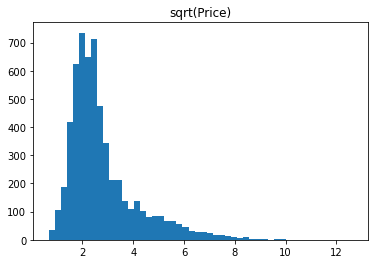

In [29]:
plt.hist(np.log(df['Price']), 50)
plt.title('log(Price)')
plt.show()
plt.hist(np.arcsinh(df_copy['Price']), 50)
plt.title('arcsinh(Price)')
plt.show()
plt.hist(np.sqrt(df_copy['Price']), 50)
plt.title('sqrt(Price)')
plt.show()

All three have helped but the sqrt - while improved - is not quite strong enough and the result is still too skewed. I prefer the log or arcsinh. The log and arcsinh look similar so the difference there is more be about interpretation.

***`Price` compared to vehicle `Year` based on `Vehicle_Owner_Type`***

I'll take an expanded look at `Price` by comparing it to other features such as `Year` and `Vehicle_Owner_Type`

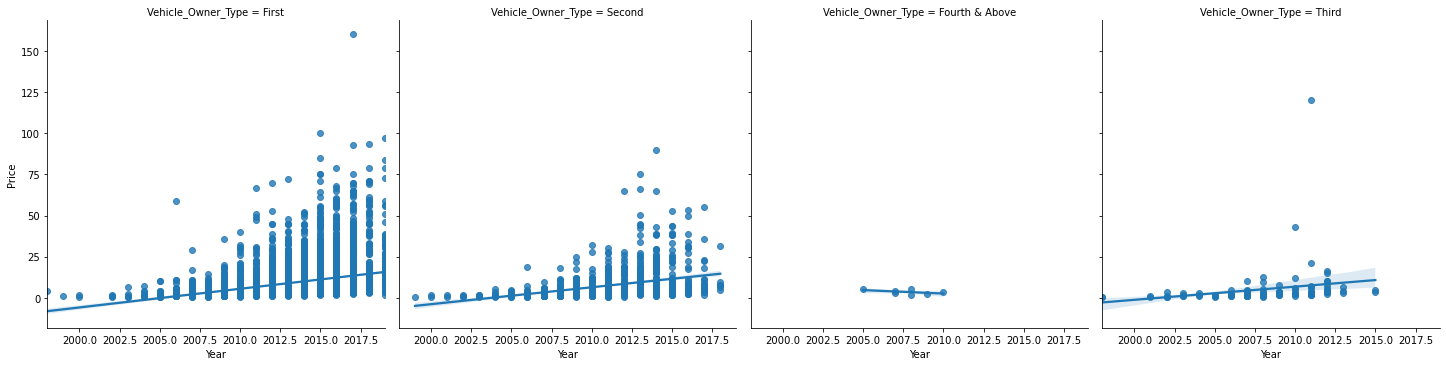

In [30]:
sns.lmplot(x='Year', y='Price', col='Vehicle_Owner_Type', data=df_copy);

***Observations***
1. There appears to be a slight negative correlation between price and year for cars based on owner type of 'Fourth & Above'. This seems counter-intuitive, however this may be the result of not having enough data.
2. The newer the vehicle the higher the price, this seems to be consistent regardless of whether the vehicle is on it's first, second or third owner.
3. The majority of the data is associated with `Vehicle_Owner_Type` of First or Second

***`Power` compared to vehicle `Year` based on `Vehicle_Owner_Type`***

I'll take an expanded look at `Power` by comparing it to other features such as `Year` and `Vehicle_Owner_Type`

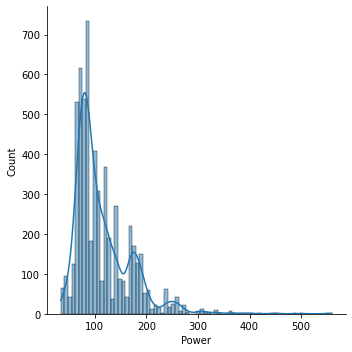

In [31]:
sns.displot(df_copy['Power'], kde = True);

***`Year` compared to `Power` based on `Owner_Type`***

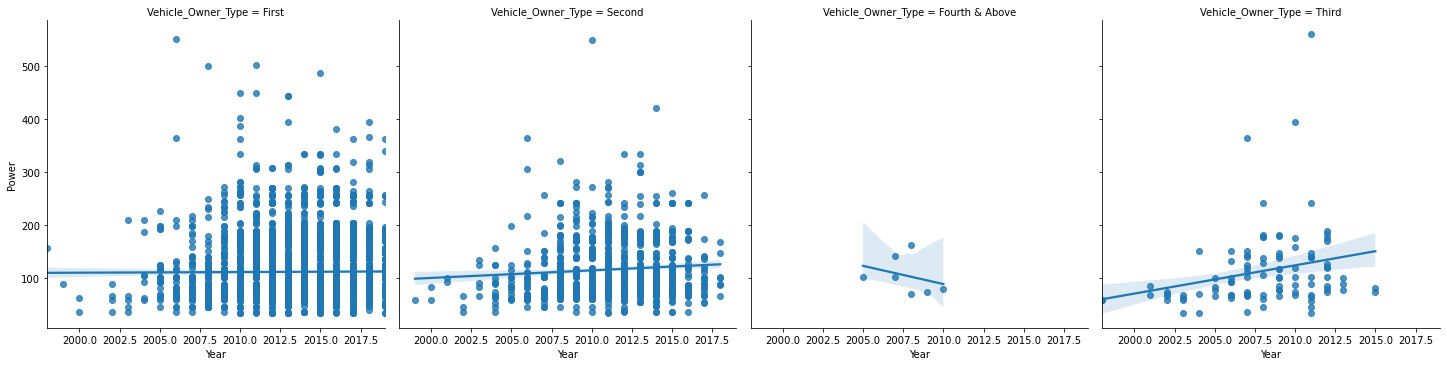

In [32]:
sns.lmplot(x='Year', y='Power', col='Vehicle_Owner_Type', data=df_copy);

***Observations***
1. Appears to be no correlation between `Power` and `Year` for `Vehicle_Owner_Type` of 'First'.
2. Appears to be a subtle correlation between `Power` and `Year` for `Vehicle_Owner_Type` of 'Second'.
3. Appears to be a positive correlation between `Power` and `Year` for `Vehicle_Owner_Type` of 'Third'.
4. Appears to be a negative between `Power` and `Year` for `Vehicle_Owner_Type` of 'Fourth & Above' but this could be due to lack of data.

# 5. Build the Linear Model 

I'll begin by dropping categorical values from the independent variables dataset, these include the `Vehicle_Make`, `Vehicle_Model`, `Vehicle_Location`, `Vehicle_Fuel_Type`, `Vehicle_Transmission`, `Vehicle_Owner_Type` and `Engine` columns.

In [33]:
# lets build our linear model
# independant variables
x = df_copy.drop(['Price'
                  ,'Vehicle_Make'
                  ,'Vehicle_Model'
                  ,'Vehicle_Location'
                  ,'Vehicle_Fuel_Type'
                  ,'Vehicle_Transmission'
                  ,'Vehicle_Owner_Type'
                  ,'Engine'], axis=1)
# the dependent variable
y = df_copy[['Price']]

In [34]:
# Split x and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [35]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [36]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Year is 0.4581226783383609
The coefficient for Kilometers_Driven is -2.708266378486778e-05
The coefficient for Mileage is 0.003690577526312599
The coefficient for Power is 0.06115755631797748
The coefficient for Seats is 1.6195431107838478
The coefficient for Car_Age is -0.45812267833991505
The coefficient for Km_Per_Year is 0.0001208949472421561
The coefficient for Make_Audi is 3.969771508073548
The coefficient for Make_BMW is -4.783073505370485
The coefficient for Make_Bentley is 11.937242950507216
The coefficient for Make_Chevrolet is -9.345553143216888
The coefficient for Make_Datsun is -9.917218324227704
The coefficient for Make_Fiat is -8.238504907803039
The coefficient for Make_Force is -6.436519591502435
The coefficient for Make_Ford is -10.777944603646143
The coefficient for Make_Honda is -9.963556935940975
The coefficient for Make_Hyundai is -6.180791761982165
The coefficient for Make_ISUZU is -4.060836579308266
The coefficient for Make_Isuzu is -1.7907709

In [37]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -918.1631632790868


In [38]:
score_train = regression_model.score(x_train, y_train)
print(f'The TRAIN R^2 score is: {score_train}')

The TRAIN R^2 score is: 0.854492247247335


In [39]:
#out of sample score (R^2)

score_test = regression_model.score(x_test, y_test)
print(f'The TEST R^2 score is: {score_test}')

The TEST R^2 score is: 0.8246996338763245


Now I'll take a look at the shape of the final dataset used within the linear regression model.

In [40]:
# Lets check the final shape of the dataset
r4 = x_train.shape[0]
c4 = x_train.shape[1]

print(f'This model used {r4} rows and {c4} columns, which is {r1 - r4} fewer rows and {c4-c1} more columns than we started with.')

This model used 4110 rows and 255 columns, which is 3143 fewer rows and 242 more columns than we started with.


***Recommendations***
1. Rather than using a single column for `Name` consider segmenting based on `Manufacurer`, `Model`, and `Package` as this may help reduce the noise and better explain the variance in price.
2. Because Price was the target variable I opted to remove rows where price was missing as opposed to using assumed values. I'd recommend placing a high priority on ensuring the price values are always included.
3. After testing the model using 'average new price' based on Make and Model I'm unsure if `New_Price` is an important variable. I can see where when combined with other variables it could aid in improving the R^2 but futher research needs to be done to better understand 'New Price' and any other variables that may help improve the R^2 score.
4. Funding method can create variability in the price of a used car, it could be insightful to capture whether a car was paid for 'in-full by the customer' or 'financed by the seller' and if possible 'down payment amount' could also provide added value to the model.